1. Preprocessing

Image shape: (296, 384)


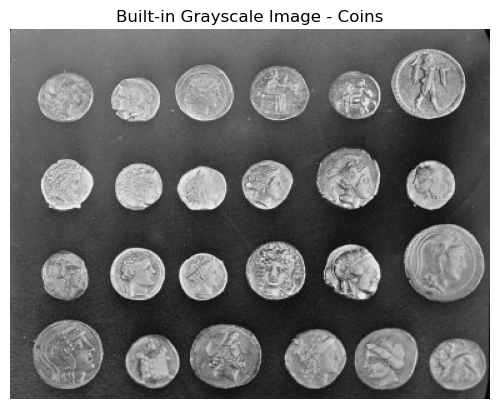

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Load a different grayscale image
img = data.coins()  # You can also try data.moon() or data.page()

# Crop the image to make dimensions divisible by 8
h, w = img.shape
img = img[:h - h % 8, :w - w % 8]

# Display the image
print("Image shape:", img.shape)
plt.imshow(img, cmap='gray')
plt.title("Built-in Grayscale Image - Coins")
plt.axis('off')
plt.show()


2. Block-wise SVD Function

non-overlapping 8×8 blocks

In [98]:
h, w = img.shape

print("Image shape:", img.shape)
print("Extracting first few 8x8 blocks-")

for i in range(0, min(h, 16), 8):
    for j in range(0, min(w, 16), 8):
        block = img[i:i+8, j:j+8]
        print(f"\nBlock at ({i}, {j}):\n", block)

Image shape: (296, 384)
Extracting first few 8x8 blocks-

Block at (0, 0):
 [[ 47 123 133 129 137 132 138 135]
 [ 93 144 145 143 145 132 135 133]
 [126 147 143 147 145 132 136 133]
 [131 136 133 139 136 130 138 133]
 [131 133 134 135 129 130 137 128]
 [128 133 137 132 127 133 135 126]
 [127 130 133 130 131 135 132 130]
 [132 130 131 130 135 135 128 132]]

Block at (0, 8):
 [[134 133 131 130 129 129 128 128]
 [134 133 131 131 131 131 130 129]
 [134 132 131 132 134 135 132 129]
 [133 131 130 133 137 137 133 129]
 [132 130 130 133 137 138 134 129]
 [131 130 130 133 136 136 133 130]
 [130 129 130 132 133 134 132 130]
 [129 129 130 131 132 131 131 131]]

Block at (8, 0):
 [[129 134 136 133 129 129 129 128]
 [125 130 133 131 129 129 129 129]
 [130 133 134 131 128 127 126 125]
 [132 135 135 131 128 127 126 124]
 [126 129 130 128 128 130 130 129]
 [126 127 127 125 125 127 127 125]
 [129 129 128 124 123 123 122 120]
 [127 128 126 124 124 125 125 123]]

Block at (8, 8):
 [[131 129 128 128 129 12

Implement compress_block(block, k)

In [100]:
def compress_block(block, k):
    U, S, Vt = np.linalg.svd(block, full_matrices=False)
    S[k:] = 0
    compressed = np.dot(U, np.dot(np.diag(S), Vt))
    return compressed

In [102]:
sample_block = img[0:8, 0:8]
compressed_block = compress_block(sample_block, k=4)
print("Original Block:\n", sample_block)
print("\nCompressed Block (k=4):\n", compressed_block.astype(np.uint8))

Original Block:
 [[ 47 123 133 129 137 132 138 135]
 [ 93 144 145 143 145 132 135 133]
 [126 147 143 147 145 132 136 133]
 [131 136 133 139 136 130 138 133]
 [131 133 134 135 129 130 137 128]
 [128 133 137 132 127 133 135 126]
 [127 130 133 130 131 135 132 130]
 [132 130 131 130 135 135 128 132]]

Compressed Block (k=4):
 [[ 46 123 133 128 136 132 137 134]
 [ 93 143 143 144 145 130 136 133]
 [125 147 143 146 144 132 135 132]
 [130 136 136 137 134 133 135 130]
 [130 133 134 134 128 130 136 127]
 [128 132 134 133 128 130 136 127]
 [127 129 131 130 131 133 132 130]
 [132 129 130 130 135 134 128 132]]


Recombining blocks into a full image

In [104]:
def compress_image_blockwise(img, k):
    h, w = img.shape
    compressed_img = np.zeros_like(img, dtype=np.float32)

    for i in range(0, h, 8):
        for j in range(0, w, 8):
            block = img[i:i+8, j:j+8]
            compressed_block = compress_block(block, k)
            compressed_img[i:i+8, j:j+8] = compressed_block

    return np.clip(compressed_img, 0, 255).astype(np.uint8)

Final image

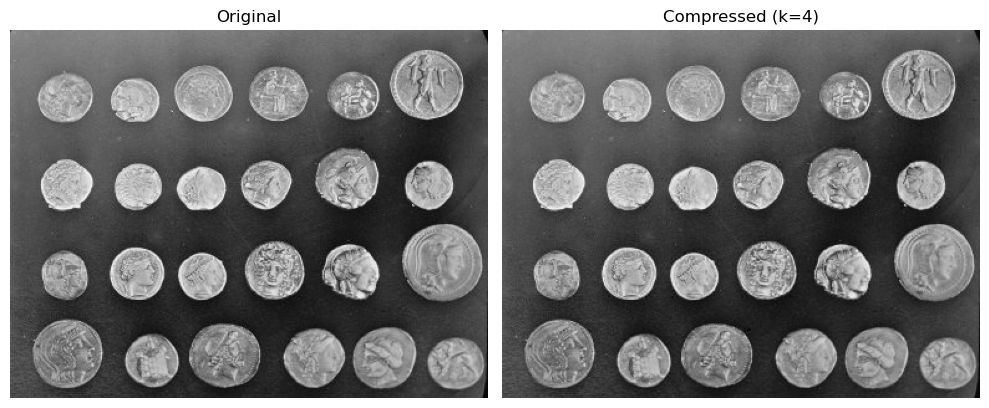

In [106]:
compressed_img = compress_image_blockwise(img, k=4)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_img, cmap='gray')
plt.title("Compressed (k=4)")
plt.axis('off')

plt.tight_layout()
plt.show()

3. Compression analysis

Apply Block-wise SVD for each k ∈ {1,...,8}

In [108]:
compressed_images = {}
k_values = list(range(1, 9))

for k in k_values:
    compressed_images[k] = compress_image_blockwise(img, k)

Compute Compression Ratio for each k

In [110]:
compression_ratios = []

for k in k_values:
    original_values = 64
    retained_values = k * (8 + 8 + 1)
    ratio = original_values / retained_values
    compression_ratios.append(ratio)

print("Compression Ratios for k = 1 to 8:\n", compression_ratios)

Compression Ratios for k = 1 to 8:
 [3.764705882352941, 1.8823529411764706, 1.2549019607843137, 0.9411764705882353, 0.7529411764705882, 0.6274509803921569, 0.5378151260504201, 0.47058823529411764]


In [34]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/39.5 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.2/39.5 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.2/39.5 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.3/39.5 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.4/39.5 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.5/39.5 MB 1.6 MB/s eta 0:00:26
    --------------------------------------- 0.6/39.5 MB 1.6 MB/s eta 0:00:25
    --------------------------------------- 0.6/39.5 MB 1.6 MB/s eta 0:00:25
    --------------------------------------- 0.7/39.5 MB 1.6 MB/s eta 0:00:24
    --------------------------------------- 0.8/39.5 MB 1.7 MB/s eta 0:00:24
    --------------------------------------- 0.9/39.5 MB 1.7 MB/s eta 0:00:23
   - --------

In [112]:
import os
import cv2

output_folder = "compressed_outputs"
os.makedirs(output_folder, exist_ok=True)

for k, image in compressed_images.items():
    filename = f"{output_folder}/compressed_k{k}.png"
    cv2.imwrite(filename, image)

print(f"Compressed images saved in '{output_folder}' folder.")

Compressed images saved in 'compressed_outputs' folder.


4. Visualization

Compression Ratio vs k

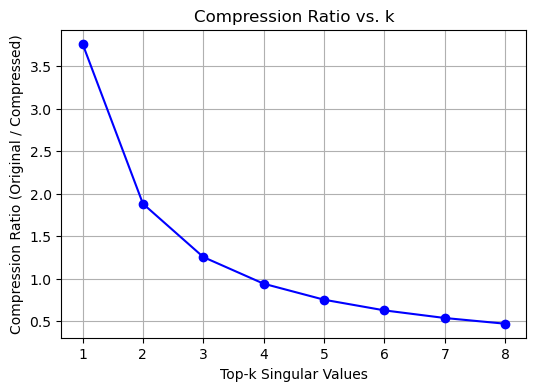

In [117]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, compression_ratios, marker='o', linestyle='-', color='blue')
plt.title("Compression Ratio vs. k")
plt.xlabel("Top-k Singular Values")
plt.ylabel("Compression Ratio (Original / Compressed)")
plt.grid(True)
plt.xticks(k_values)
plt.show()

Reconstruction Error (Frobenius norm) vs k

In [120]:

def frobenius_norm(original, compressed):
    return np.linalg.norm(original.astype(np.float32) - compressed.astype(np.float32))

frobenius_errors = []
k_values = list(range(1, 9))

for k in k_values:
    compressed = compressed_images[k]
    error = frobenius_norm(img, compressed)
    frobenius_errors.append(error)

print("Frobenius Errors for each k:\n", frobenius_errors)

Frobenius Errors for each k:
 [4723.8755, 2846.4834, 1719.4523, 1045.5438, 613.76215, 359.9222, 247.61664, 0.0]


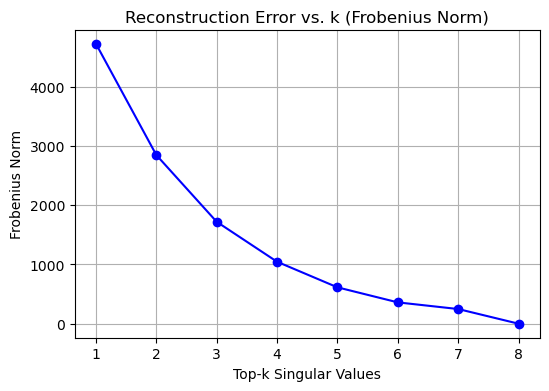

In [122]:

plt.figure(figsize=(6, 4))
plt.plot(k_values, frobenius_errors, marker='o', linestyle='-', color='blue')
plt.title("Reconstruction Error vs. k (Frobenius Norm)")
plt.xlabel("Top-k Singular Values")
plt.ylabel("Frobenius Norm")
plt.grid(True)
plt.xticks(k_values)
plt.show()

PSNR (Peak Signal-to-Noise Ratio)

In [125]:
def psnr(original, compressed):
    mse = np.mean((original.astype(np.float32) - compressed.astype(np.float32)) ** 2)
    if mse == 0:
        return float('inf')
    return 10 * np.log10(255**2 / mse)

psnr_values = []
k_values = list(range(1, 9))

for k in k_values:
    compressed = compressed_images[k]
    psnr_val = psnr(img, compressed)
    psnr_values.append(psnr_val)

print("PSNR values (in dB) for each k:\n", psnr_values)

PSNR values (in dB) for each k:
 [25.20106415457018, 29.60085949601561, 33.97923062361882, 38.30018755015607, 42.927030637025055, 47.56285975827093, 50.811436636193264, inf]


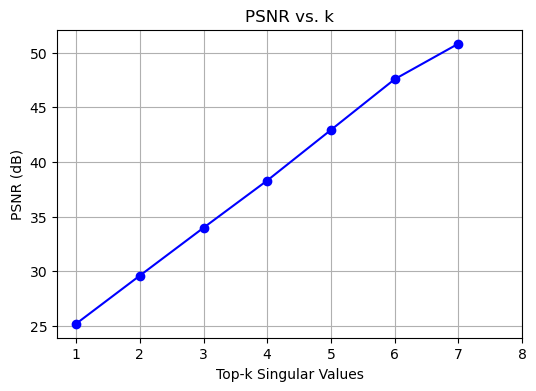

In [127]:

plt.figure(figsize=(6, 4))
plt.plot(k_values, psnr_values, marker='o', linestyle='-', color='blue')
plt.title("PSNR vs. k")
plt.xlabel("Top-k Singular Values")
plt.ylabel("PSNR (dB)")
plt.grid(True)
plt.xticks(k_values)
plt.show()

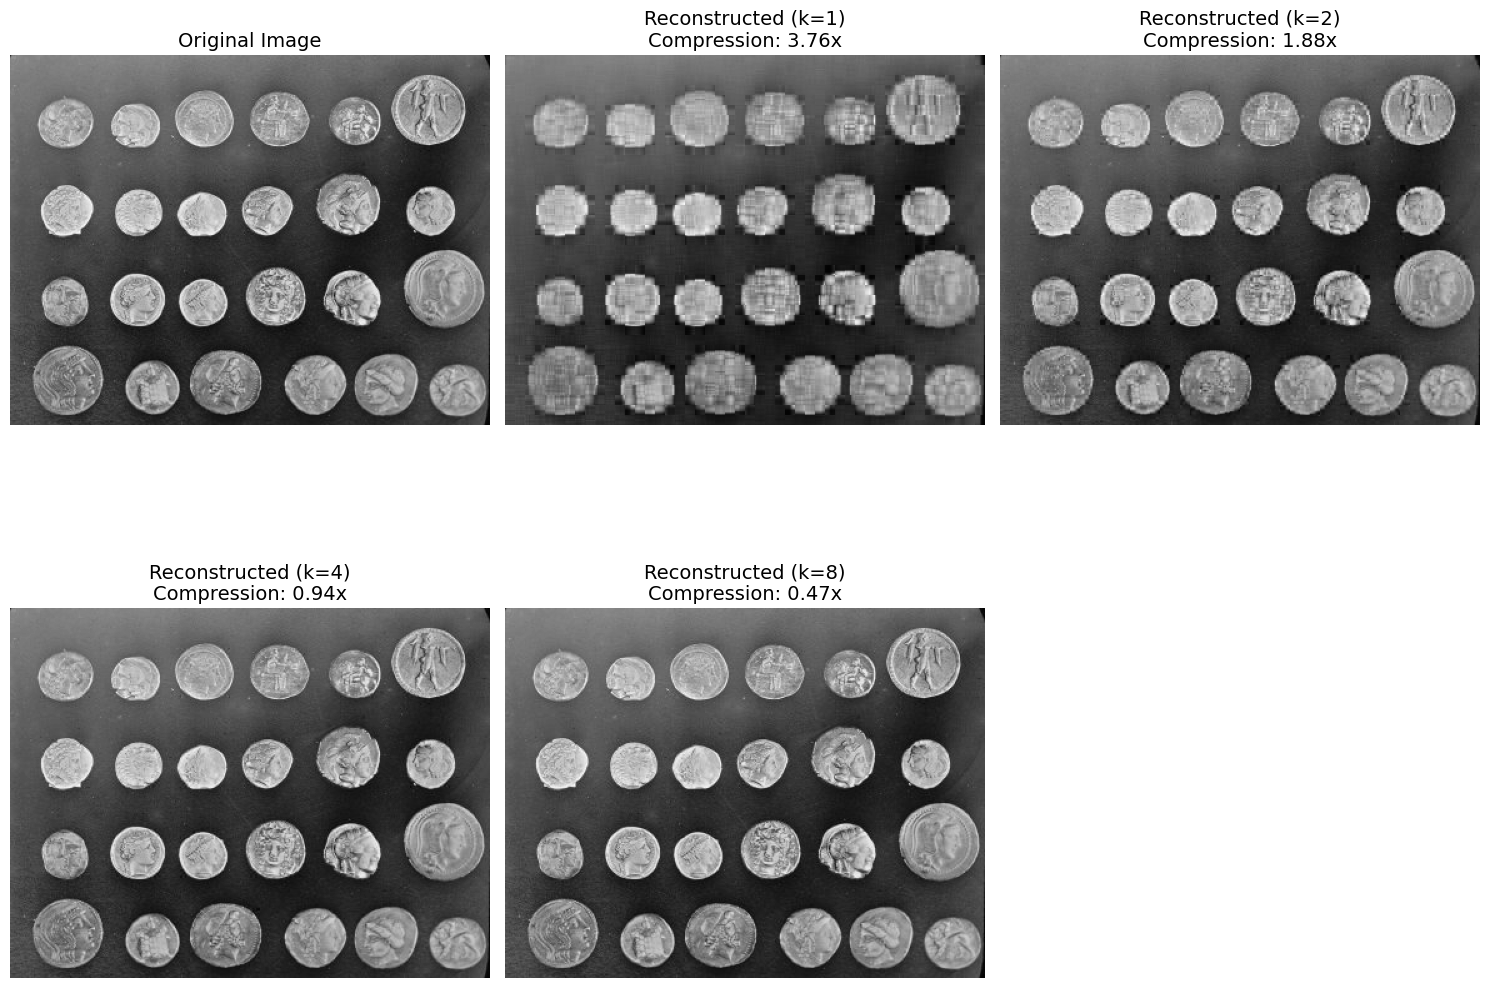

In [137]:

k_to_display = [1, 2, 4, 8] 

plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image", fontsize=14)
plt.axis('off')

for i, k in enumerate(k_to_display):
    plt.subplot(2, 3, i+2)
    plt.imshow(compressed_images[k], cmap='gray')
    plt.title(f"Reconstructed (k={k})\nCompression: {compression_ratios[k-1]:.2f}x", fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.savefig('visual_comparison.png')
plt.show()